<a href="https://colab.research.google.com/github/huongtn1112/NLP_final/blob/main/CenterNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CenterNet (Objects as Points) Object Detection Demo

This is a [CenterNet (Objects as Points)](https://arxiv.org/abs/1904.07850) colab notebook using [xingyizhou/CenterNet](https://github.com/xingyizhou/CenterNet).


## Install CenterNet

In [1]:
!pip install -U torch==1.4 torchvision==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html

import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/xingyizhou/CenterNet.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone
  !git clone -q --depth 1 $git_repo_url
  # fix DCNv2
  !cd {project_name}/src/lib/models/networks && rm -rf DCNv2 && git clone https://github.com/CharlesShang/DCNv2.git && cd DCNv2 && ./make.sh
  # dependencies
  !cd $project_name && pip install -q -r requirements.txt

import sys
sys.path.insert(0, join(project_name, 'src/lib'))
sys.path.append(join(project_name, 'src'))
# following 2 lines needed to avoid later import error
sys.path.append(join(project_name, 'src/lib/models/networks/DCNv2'))
from dcn_v2 import DCN

import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import clear_output

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 753.4 MB 7.2 kB/s 
     |████████████████████████████████| 4.0 MB 41.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
Cloning into 'DCNv2'...
remote: Enumerating objects: 214, done.
remote: Total 214 (del

## Download a pretrained weight

We are going to use `ctdet_coco_dla_2x` which has 37.4 mAP.

In [2]:
model_name = 'ctdet_coco_dla_2x.pth'
if not exists(model_name):
  !pip install -q gdown
  !gdown 'https://drive.google.com/uc?id=1pl_-ael8wERdUREEnaIfqOV_VF2bEVRT' # 37.4mAP

Downloading...
From: https://drive.google.com/uc?id=1pl_-ael8wERdUREEnaIfqOV_VF2bEVRT
To: /content/ctdet_coco_dla_2x.pth
100% 80.9M/80.9M [00:00<00:00, 132MB/s] 


## Initialize CenterNet

In [3]:
from opts import opts
from detectors.detector_factory import detector_factory

# CenterNet opts want argv, so overwrite it
import sys
sys.argv = ['centernet', 'ctdet']
opt = opts().init()
opt.load_model = model_name
opt.debug = 1

Detector = detector_factory[opt.task]
detector = Detector(opt)


def imshow(title, bgr_img):
  plt.figure(figsize=(20,10))
  plt.imshow(bgr_img[:,:,::-1])

# patch cv2.imshow
import cv2
cv2.imshow = imshow

NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  CenterNet/src/lib/../../exp/ctdet/default
heads {'hm': 80, 'wh': 2, 'reg': 2}
Creating model...


Downloading: "http://dl.yf.io/dla/models/imagenet/dla34-ba72cf86.pth" to /root/.cache/torch/checkpoints/dla34-ba72cf86.pth


  0%|          | 0.00/60.3M [00:00<?, ?B/s]

loaded ctdet_coco_dla_2x.pth, epoch 230


## Evaluate on a test image

We will test on an image already included in the repo `images/17790319373_bd19b24cfc_k.jpg`:

Now, test the CenterNet on the above image:

In [53]:
def show_detector_img(img_add):
  img = cv2.imread(join(project_name, img_add))
  imshow('', img)
  ret = detector.run(img)

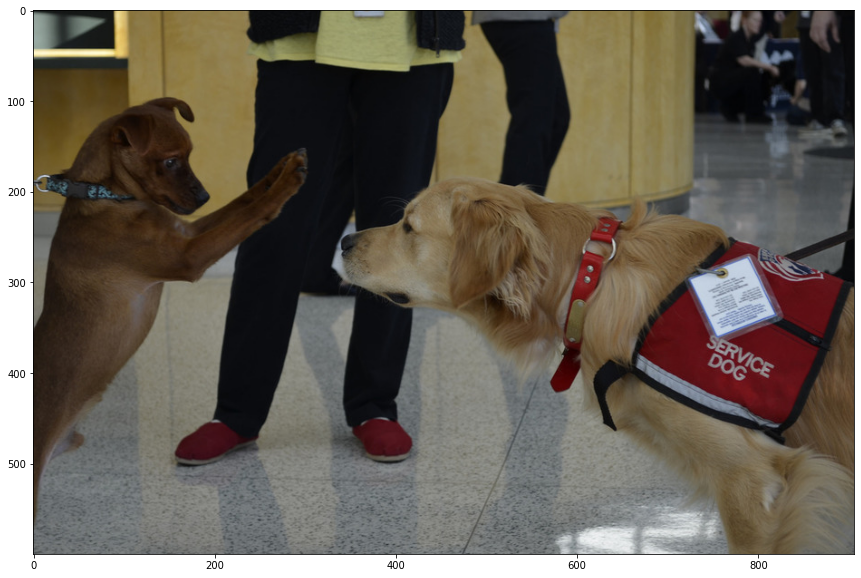

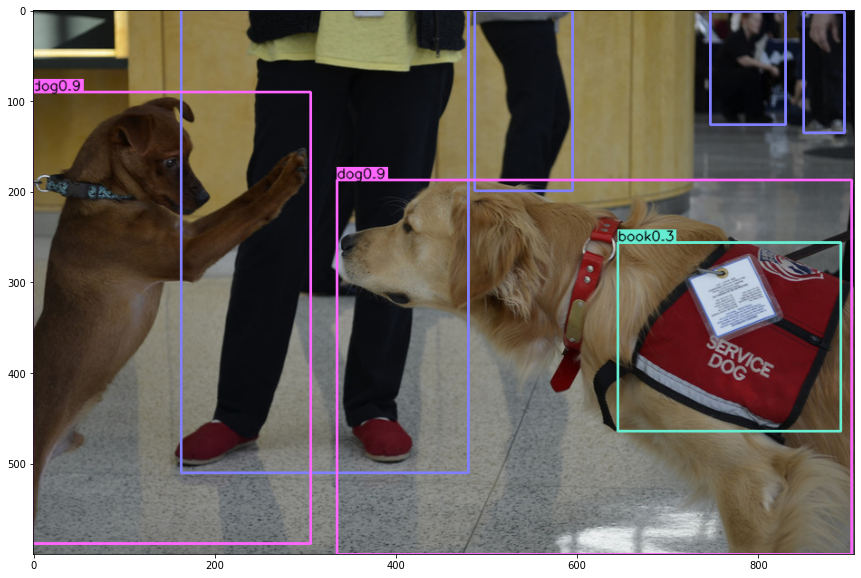

In [59]:
show_detector_img("images/16004479832_a748d55f21_k.jpg")

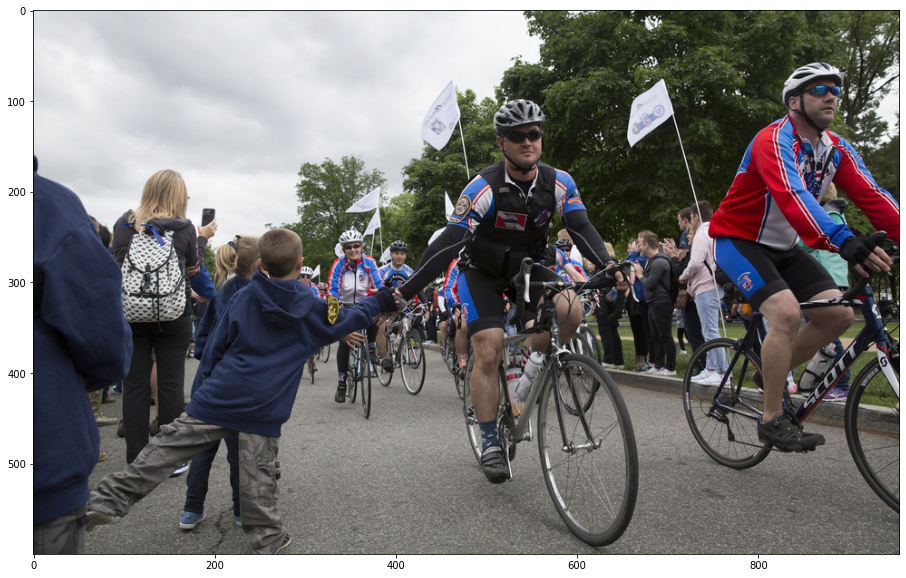

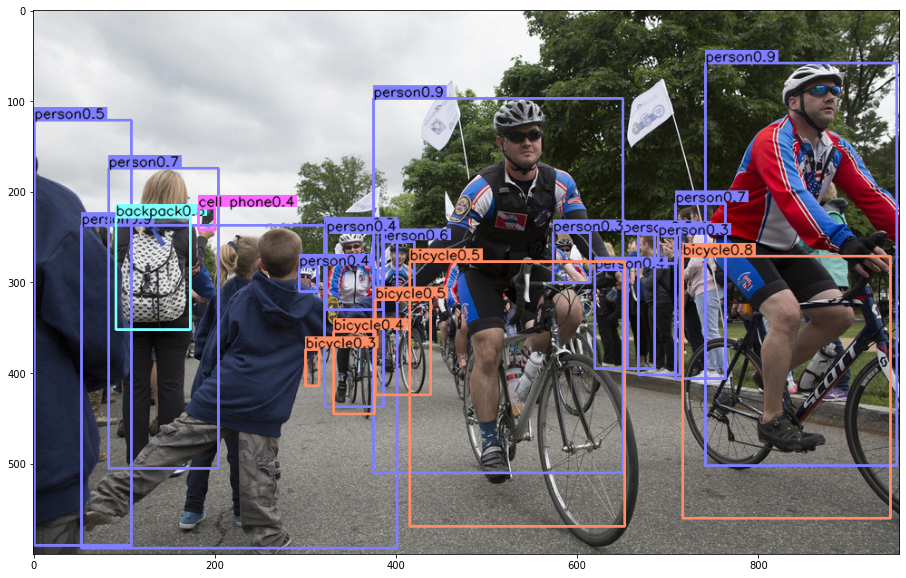

In [91]:
show_detector_img("images/33823288584_1d21cf0a26_k.jpg")

In [82]:
!ls

CenterNet  ctdet_coco_dla_2x.pth  sample_data


In [89]:
!cd sample_data

In [90]:
!ls

CenterNet  ctdet_coco_dla_2x.pth  sample_data


In [85]:
!cd src

/bin/bash: line 0: cd: src: No such file or directory
